# 서포트벡터머신(SVM)_분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
# 한글 폰트 적용
matplotlib.rc('font', family = 'Nanumgothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.  
데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)  
 -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개)   

In [2]:
df_raw = pd.read_csv('./Data/유방암.csv', engine = 'python', encoding = 'cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df_raw.isnull().sum()


diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치가 없으므로 해당 데이터 그대로 분석을 진행한다.

In [51]:
df_raw_x = df_raw.drop(['diagnosis'], axis = 1)
df_raw_y = df_raw['diagnosis']
df_raw_y = np.where(df_raw_y == '음성', 0, 1)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

## 기본모델 생성

In [52]:
# svm 생성
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(svm_uncustomized.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score (df_test_x, df_test_y)))


Accuracy on train set: 0.885
Accuracy on test set: 0.891


train보다 test accuracy가 더 높게 나오는 것으로 봐서 모델의 복잡도를 올릴 필요가 있다.

#### C: 규제에 대한 강도 변경

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [ c * 0.1 for c in range(1, 10)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.854,0.859
1,0.2,0.875,0.867
2,0.3,0.885,0.875
3,0.4,0.880,0.867
4,0.5,0.880,0.867
5,0.6,0.880,0.867
6,0.7,0.885,0.891
7,0.8,0.885,0.891
8,0.9,0.885,0.891


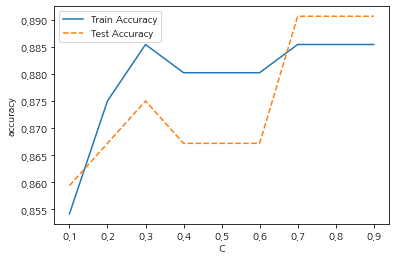

In [54]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C는 0.3으로 지정

#### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [55]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma
para_gamma = [10**gamma for gamma in range(-2, 3)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.599,0.758
2,1.00,0.599,0.758
3,10.00,0.599,0.758
4,100.00,0.599,0.758


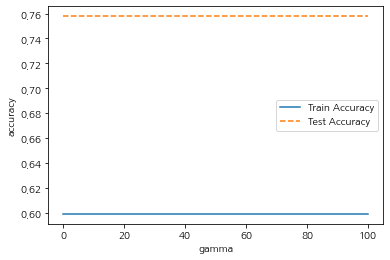

In [56]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

정확도에 영향을 미치지 않음

#### scale 변환

In [57]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [58]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,
                                                     random_state = 1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('test data X size: {}'.format(df_scaled_test_x.shape))

train data X size: (192, 30)
test data X size: (128, 30)


In [59]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.995
Accuracy on test set:0.961


Accuracy on train set: 0.885  
Accuracy on test set: 0.891   
scale 변환 전의 accuracy보다 증가하였다.

Scale 변환한 모델에 대한 파라미터

#### C 변환 

In [60]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [c * 0.1 for c in range(1, 10)]

for v_C in para_c:
    svm_scaled = SVC(C = v_C, random_state = 1234)
    svm_scaled.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm_scaled.score(df_scaled_train_x,  df_train_y))
    test_accuracy.append(svm_scaled.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953


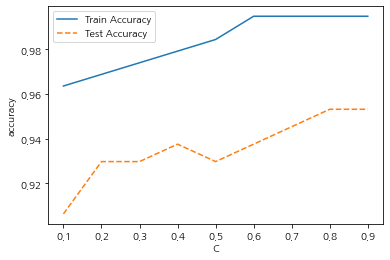

In [61]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C가 0.8일 때부터 saturation됨

gamma 변환

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [gamma * 0.1 for gamma in range(1, 10)]

for v_gamma in para_gamma:
    svm_scaled = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm_scaled.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm_scaled.score(df_scaled_train_x,  df_train_y))
    test_accuracy.append(svm_scaled.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.922
1,0.2,1.0,0.906
2,0.3,1.0,0.875
3,0.4,1.0,0.875
4,0.5,1.0,0.867
5,0.6,1.0,0.836
6,0.7,1.0,0.812
7,0.8,1.0,0.789
8,0.9,1.0,0.773


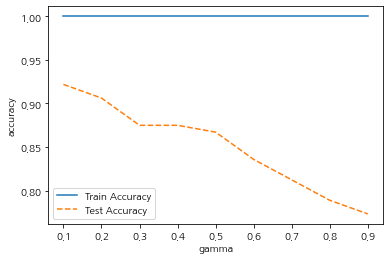

In [63]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

gamma = 0.1

In [64]:
svc_final = SVC(gamma = 0.1, C = 0.8, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:0.995
Accuracy on test set:0.922
Confusion matrix: 
[[91  6]
 [ 4 27]]


> 결론  
SVM을 사용하여 유방암의 양성, 음성 판단 정확도를 계산해본 결과 test data에 대해 92.2%의 정확도를 보였다. 양성이라고 예측했을 때 실제로 양성일 확률(정밀도)는 81.8%이고 양성을 음성으로 판단할 확률은 12.9%로 여전히 높은 수치이다. 해당 모델역시 의료용을 쓰기에는 성능 향상이 조금 더 필요하다. 